In [49]:
import networkx as nx
import pandas as pd

In [50]:
data = pd.read_csv("#strajkkobiet.csv")
df = pd.DataFrame(columns = ['source', 'target'])
for index, row in data.iterrows():
    mentions = list(row['mentions'].split(","))
    for mention in mentions:
        if mention != '[]':
            mention = mention.replace(' ','')
            mention = mention.replace('[','')
            mention = mention.replace(']','')
            mention = mention.replace('\'','')
            print(mention)
            data_tweet = {'source':  row['username'], 'target': mention}
            df = df.append(data_tweet, ignore_index=True)
   

kopiecmaciej
__lewica
weronika_jagus
fulu77
andrzejduda
morawieckim
akcjademokracja
andrzejduda
morawieckim
farsapl
razem_londyn
kod_polonia_uk
strajkkobiet
strajkkobiet
jakubmokotow
zpopk
orzechtwardy
akcjademokracja
donaldtuskepp
igorsokolowski
policja_ksp
akcjademokracja
wiadomo_co
akcjademokracja
akcjademokracja
akcjademokracja
akcjademokracja
strajk_kobiet
polskapolicja
akcjademokracja
aklarenbach
sasinjacek
morawieckim
akcjademokracja
akcjademokracja
akcjademokracja
dominikkkuc
akcjademokracja
youtube
strajkkobiet
akcjademokracja
akcjademokracja
akcjademokracja
akcjademokracja
akcjademokracja
jerzkwasniewski
ordoiuris
akcjademokracja
pisorgpl
rbakiewicz
arek_jarosz
konfederacja_
akcjademokracja
akcjademokracja
akcjademokracja
akcjademokracja
strajkkobiet
akcjademokracja
akcjademokracja
akcjademokracja
dwielowieyska
akcjademokracja
brbieringz
akcjademokracja
tymoteuszzych
ordoiuris
akcjademokracja
akcjademokracja
pisorgpl
akcjademokracja
akcjademokracja
akcjademokracja
strajkkobie

waclawjan
polskapolicja
akcjademokracja
jaroslawkuzniar
pisorgpl
robert91415272
pisorgpl
jkowalski_posel
polskapolicja
jkowalski_posel
rtdw_nowy_swiat
akcjademokracja
vashappenin93
krzysztofbosak
vashappenin93
shawnmojebubu
change
waclawjan
robertbiedron
akcjademokracja
pisorgpl
akcjademokracja
akcjademokracja
vashappenin93
krzysztofbosak
konfederacja_
slawomirnitras
ctomczyk
strajkkobiet
andrzejduda
andrzejduda
andrzejduda
morawieckim
jkowalski_posel
polskapolicja
vashappenin93
tvn24
pisorgpl
metalheadpapryk
r_a_ziemkiewicz
pisorgpl
jkowalski_posel
polskapolicja
lewitujacyumysl
weronika_jagus
akcjademokracja
krzysztofbosak
radiozet_news
strajkkobiet
edkajoanna
pisorgpl
akcjademokracja
ruchosmiugwiazd
paulina30996015
jukas007
shawnmojebubu
krzysztofbosak
vashappenin93
akcjademokracja
rafalbochenek
konradberkowicz
filipkaczynski
iwonamichalek
tvn24
shawnmojebubu
pilne24
shawnmojebubu
strajkkobiet
akcjademokracja
adoreyoutallie
__lewica
lewica_news
lewicowyhub
joannakluzik
janspiewak
raf

krystpawlowicz
policja_ksp
robertbiedron
paweljanczyk
tvp_info
policja_ksp
usambpoland
andrzejduda
prezydentpl
facebookwatch
ogorekmagda
tvp_info
kurskipl
pisorgpl
razemwm
szerszeniewicz
akcjademokracja
akcjademokracja
louiseyelynn
akcjademokracja
bartstaszewski
mrpandax9
iga_swiatek
akcjademokracja
spychalski_b
andrzejduda
akcjademokracja
arianagrande
andrzejduda
tvn24
cnn
bbcworld
poznanrazem
grupastonewall
strajkkobiet
derfreitag
ksuchanow
andrzejduda
iga_swiatek
policja_ksp
zreaels
asephear
chlopaku
akcjademokracja
schwertnerpl
ula_zielinska
strajkkobiet
desia___
akcjademokracja
lukaszschreiber
zreaels
kelxlie
tvp_info
harrypilar221
strajkkobiet
strajkkobiet
sjkaleta
tk_gov_pl
krzysztofbosak
premierrp
andrzejduda
abp_gadecki
zreaels
julektuwim
akcjademokracja
akcjademokracja
akcjademokracja
pisorgpl
akcjademokracja
jkmmikke
konfederacja_
madisonbeer
whilesstyles
pisorgpl
marzenanykiel
polskapolicja
akcjademokracja
strajkkobiet
akcjademokracja
akcjademokracja
papinformacje
andrzejdu

In [51]:
print(df) 

              source          target
0     mamoonamigrozi    kopiecmaciej
1     mamoonamigrozi        __lewica
2      mariposarosea  weronika_jagus
3          bchrabski          fulu77
4          bchrabski     andrzejduda
...              ...             ...
1511    glorioushobi      yoongleshi
1512    glorioushobi         zreaels
1513    glorioushobi          afcliv
1514      joanjetski         zreaels
1515       dlibyhshe         zreaels

[1516 rows x 2 columns]


In [52]:
df = df.to_csv("network.csv", index=False)

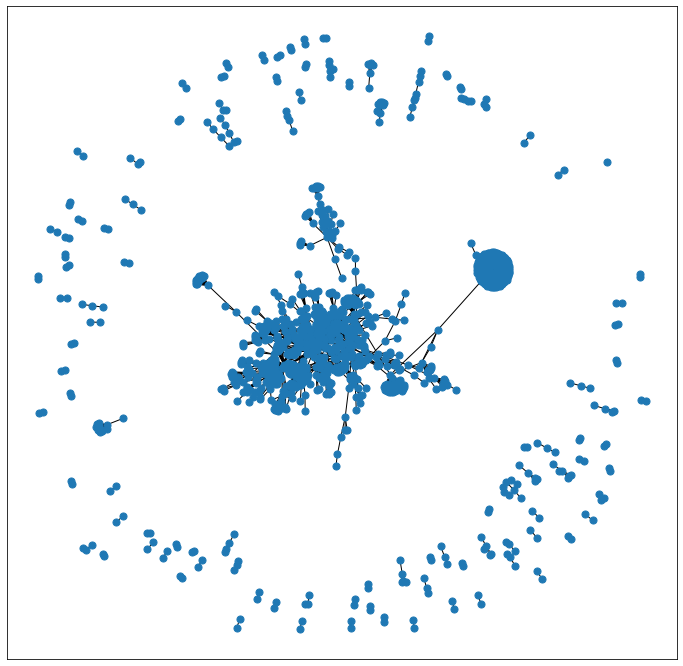

In [98]:
import matplotlib.pyplot as plt
data_network = pd.read_csv("network.csv")
G = nx.from_pandas_edgelist(data_network)
plt.figure(figsize=(12,12)) 
nx.draw_networkx(G, node_size=50,with_labels=False)
plt.show()

In [99]:
import community
partition = community.best_partition(G)
print("Communities: ", len(set(partition.values())))
mod = community.modularity(partition, G)
print("Modularity: ", mod)

Communities:  125
Modularity:  0.8532942384164195


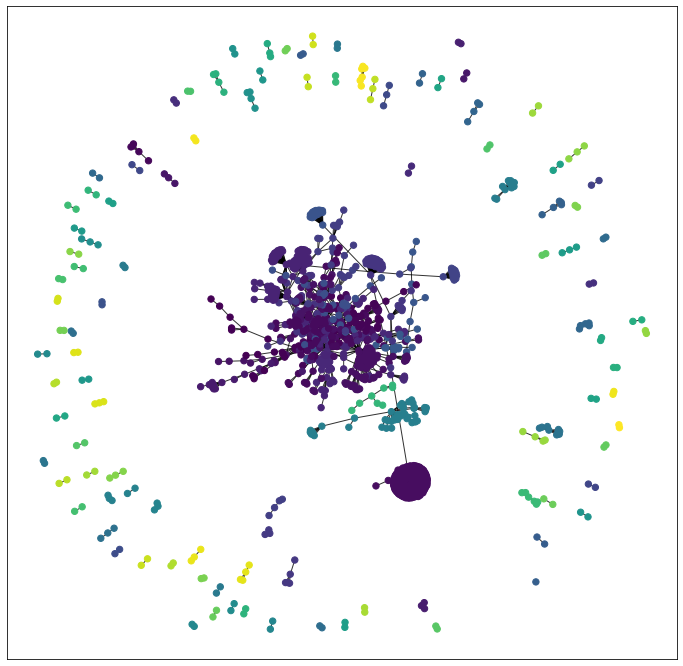

In [100]:
pos = nx.spring_layout(G)
plt.figure(figsize=(12,12)) 
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.8)
plt.show()


In [101]:
print("Max degree: ", max(G.degree(), key=lambda x: x[1]))

Max degree:  ('akcjademokracja', 223)


Communities:  18


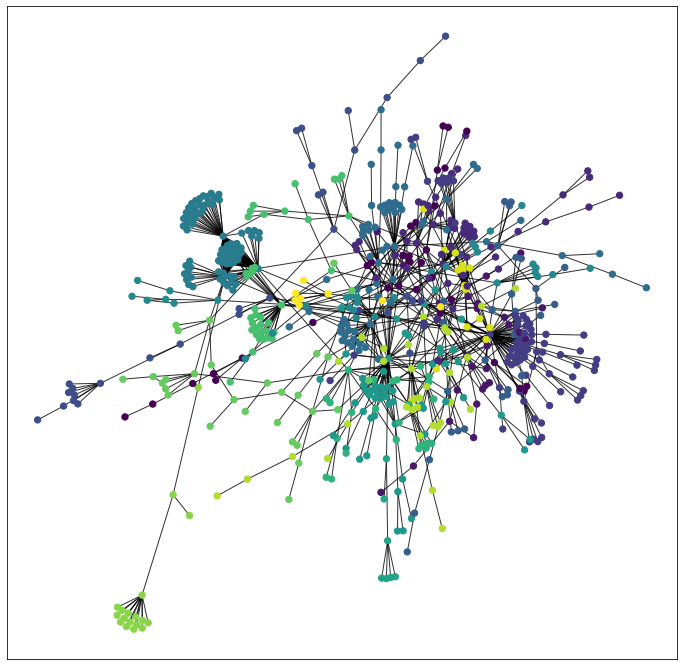

In [113]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
partition = community.best_partition(G0)
print("Communities: ", len(set(partition.values())))
pos = nx.spring_layout(G0)
plt.figure(figsize=(12,12)) 
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G0, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G0, pos, alpha=0.8)
plt.show()

In [121]:
to_delete_classes = []
for cls in range(18):
    res = sum(x == cls for x in partition.values())
    if res < 55:
        to_delete_classes.append(cls)


In [104]:
from polyglot.text import Text
def get_mean_sentiment(tweets):
    sum_polarity = 0
    for tweet in tweets:
        text = Text(tweet)
        text.language = 'pl'
        sum_polarity += text.polarity
    if len(tweets) == 0:
        return 0
    return sum_polarity/len(tweets)

In [124]:
#prepare data to classification
users_info = pd.read_csv("users2.csv")
users_to_classify = pd.DataFrame(columns = ['username', 'mean_lieks', 'mean_retweets', 
                                           'replies_mean','tweets_num', 'sentiment_mean','mentions','hashtags','class'])
partition = { k : v for k,v in partition.items() if v not in to_delete_classes}

print("Communities: ", len(set(partition.values())))
    
users_to_classify['username'] = partition.keys()
users_to_classify['class'] = partition.values()
for index, row in users_to_classify.iterrows():
    user_data = users_info[users_info.username == row['username']]
    users_to_classify.at[index, 'mean_lieks'] = user_data.likes_count.mean()
    users_to_classify.at[index, 'mean_retweets'] = user_data.retweets_count.mean()
    users_to_classify.at[index, 'tweets_num'] = len(user_data.tweet)
    users_to_classify.at[index, 'replies_mean'] = user_data.replies_count.mean()
    users_to_classify.at[index, 'sentiment_mean'] = get_mean_sentiment(user_data.tweet)
    users_to_classify.at[index, 'mentions'] = user_data.mentions.apply(
            lambda x: len(x.replace("[", '').replace("]", '').split())
        ).mean()
    users_to_classify.at[index, 'hashtags'] = user_data.hashtags.apply(
            lambda x: len(x.replace("[", '').replace("]", '').split())
        ).mean()
users_to_classify = users_to_classify.to_csv("users_to_classify.csv", index=False)

Communities:  4
